**<center> CLASIFICACIÓN DE LESIONES DERMATOLÓGICAS </center>**

**Descripción del dataset**

Utilizaremos un [dataset público](https://archive.ics.uci.edu/ml/datasets/Dermatology) de la Universidad de California Irvine. 
El diagnóstico diferencial de patologías eritemato-escamosas es un problema en dermatología. Todas ellas comparten los atributos clínicos del eritema y la piel escamosa, con muy pocas diferencias. Las patologías de este grupo son psoriasis, dermatitis seborreica, liquen plano, pitiriasis rosada, dermatitis crónica, y  pitiriasis rubra pilaris. Generalmente se necesita una biopsia para el diagnóstico, pero lamentablemente estas patologías comparten también muchos atributos histopatológicos.

In [0]:
pathology_names = ("psoriasis", "seboreic dermatitis", "lichen planus", "pityriasis rosea", "cronic dermatitis", "pityriasis rubra pilaris") 

La biopsia consiste en analizar bajo microscopio una muestra de piel y evaluar una serie de atributos. Estos se tabulan en una escala entre el 0 y el 3, según el grado en que se observa el atributo.

In [0]:
histological_variables= ["melanin incontinence"
        , "eosinophils in the infiltrate"
        , "PNL infiltrate"
        , "fibrosis of the papillary dermis"
        , "exocytosis"
        , "acanthosis"
        , "hyperkeratosis"
        , "parakeratosis"
        , "clubbing of the rete ridges"
        , "elongation of the rete ridges"
        , "thinning of the suprapapillary epidermis"
        , "spongiform pustule"
        , "munro microabcess"
        , "focal hypergranulosis"
        , "disappearance of the granular layer"
        , "vacuolisation and damage of basal layer"
        , "spongiosis"
        ,"saw-tooth appearance of retes"
        ,"follicular horn plug"
        ,"perifollicular parakeratosis"
        ,"inflammatory monoluclear inflitrate"
        ,"band-like infiltrate"]

También se tienen en cuenta factores clínicos. Estos también se tabulan en un rango de 0 a 3.

In [0]:
clinical_variables = ["erythema"
        , "scaling"
        , "definite borders"
        , "itching"
        , "koebner phenomenon"
        , "polygonal papules"
        , "follicular papules"
        , "oral mucosal involvement"
        , "knee and elbow involvement"
        , "scalp involvement"
        , "family history"]

Por último, se considera también la edad del paciente. Podemos considerar esta variable como continua

In [0]:
variable_names = clinical_variables + histological_variables
variable_names.append("Age")


**Procesamiento del dataset**

El dataset consiste de 366 casos donde se tabularon los datos clínicos del paciente y los atributos histopatológicos de la lesión.
Si tenés el repositorio clonado localmente, especificá la ruta al archivo "data_dermatology.csv". Sino, descargá el archivo "data_dermatology.csv" del repositorio y especificá la ruta al archivo descargado.

In [0]:
csvpath = "pathology.csv"

In [0]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv(csvpath,index_col=False,header=None)

In [0]:
del dataframe[35]
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


Obtener un numpy array con los valores de las 33 variables

In [0]:
data_variables = dataframe[dataframe.columns[:-2]].values #Selecciono las 33 variables clinicas e histológicas. Para convertirlo a array, uso .values
print("Cantidad de pacientes: ", data_variables.shape[0])
print("Cantidad de variables por paciente: ", data_variables.shape[1])


Cantidad de pacientes:  366
Cantidad de variables por paciente:  33


Obtener un numpy array con los valores de las 366 etiquetas "ground-truth" del tipo de lesión.

In [0]:
data_targets = dataframe[dataframe.columns[-1]].values
print("Cantidad de etiquetas de diagnóstico: ", data_targets.shape[0])

Cantidad de etiquetas de diagnóstico:  366


In [0]:
data_targets #Seis valores para las seis patologías posibles

array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2,
       5, 3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 1, 4, 2, 3, 2, 3, 1, 2, 4, 1, 2,
       5, 3, 4, 6, 2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3,
       1, 4, 5, 1, 2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3,
       1, 4, 2, 2, 5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1,
       1, 3, 5, 3, 3, 5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1,
       3, 5, 5, 1, 4, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1,
       5, 3, 2, 3, 2, 2, 4, 2, 3, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1,
       1, 2, 3, 3, 1, 1, 1, 1, 6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2,
       2, 2, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 6, 6, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 1, 1, 2, 2,
       2, 3, 3, 3, 3, 1, 1, 1, 1, 5, 5, 5, 5, 5, 3,

¿Cuál es la probabilidad a priori de cada clase? 

In [0]:
count_of_classes=np.bincount(data_targets)[1:]
prob_apriori=count_of_classes/len(data_targets)
apriori_dict=dict(zip(pathology_names,prob_apriori))
apriori_dict


{'psoriasis': 0.30601092896174864,
 'seboreic dermatitis': 0.16666666666666666,
 'lichen planus': 0.19672131147540983,
 'pityriasis rosea': 0.13387978142076504,
 'cronic dermatitis': 0.14207650273224043,
 'pityriasis rubra pilaris': 0.0546448087431694}

In [0]:
print(zip(pathology_names,prob_apriori))

In [0]:
count_of_classes=np.bincount(data_targets)
print(count_of_classes)

[  0 112  61  72  49  52  20]


**Naive Bayes Gaussiano**

Hasta ahora trabajamos con Naive Bayes Multinomial, donde la probabilidad de observar un cierto valor de una variable para un determinado modelo generador se calcula contando la cantidad de ocurrencias del valor. Otro enfoque consiste en modelar la distribución de la variable como una distribución normal. En este caso, lo que se hace es calcular la media y el desvío estándar (en base a todas las observaciones de la variable que se tienen) y se calcula la probabilidad de observar un valor con la fórmula correspondiente para esa distribución normal:
<center>
X ~ $\mathcal{N}(\mu,\,\sigma^{2}) $
<\center>
    
    
<center>
$P(x) = \frac{1}{\sigma \sqrt {2\pi}}e^{\frac{-(x-\mu)^2}{2 * \sigma^2}}$
<\center>

In [0]:
variable_name = 'itching'
variable_index=variable_names.index(variable_name)
classes_means={}
for i,clss in enumerate(pathology_names):
    clss_mean = data_variables[data_targets==i+1,variable_index].mean(axis=0) 
    classes_means[clss]=clss_mean
print("Media de " + variable_name + " por clase.")
classes_means

Media de itching por clase.


{'psoriasis': 0.9464285714285714,
 'seboreic dermatitis': 1.6229508196721312,
 'lichen planus': 2.2777777777777777,
 'pityriasis rosea': 0.46938775510204084,
 'cronic dermatitis': 1.8846153846153846,
 'pityriasis rubra pilaris': 0.5}

In [0]:
variable_name = 'itching'
variable_index=variable_names.index(variable_name)
classes_vars={}
for i,clss in enumerate(pathology_names):
    clss_var = data_variables[data_targets==i+1,variable_index].var(axis=0,ddof=1) 
    classes_vars[clss]=clss_var
print("Varianza de " + variable_name + " por clase.")
classes_vars

Varianza de itching por clase.


{'psoriasis': 1.1862934362934365,
 'seboreic dermatitis': 0.905464480874317,
 'lichen planus': 0.6259780907668232,
 'pityriasis rosea': 0.5875850340136054,
 'cronic dermatitis': 1.08446455505279,
 'pityriasis rubra pilaris': 0.3684210526315789}

Para cada clase, podemos modelar una distribución normal de cada variable, a partir de la media y el desvío de esta variable en nuestra muestra. 

In [0]:
import matplotlib.pyplot as plt
def gaussian(x, mu, sig):
    return np.exp(-np.power((x - mu)/sig, 2.)/2)/(np.sqrt(2.*np.pi)*sig)

def plot_gaussian(mu=0, sig= 1, points = 200, N = 2, marker=None, label = None, x = None, color = None, 
                  x_label='',y_label='',ax = None, figsize = (20,10), center_label_tick = None):
    if ax is None:
        f, ax = plt.subplots(1, 1, sharey=True, sharex=True, figsize = figsize)
    if x is None:
        x = np.linspace(mu-N*sig, mu+N*sig, points)
    y = gaussian(x, mu, sig)
    ax.plot(x,y, marker = marker, label = label, color = color)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

    if center_label_tick is not None:
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels[int((len(labels)-1)/2)] = center_label_tick
        ax.set_xticklabels(labels)

    return x, y

Siguiendo con el ejemplo de la variable 'itching', graficamos las distribuciones normales de cada patología.

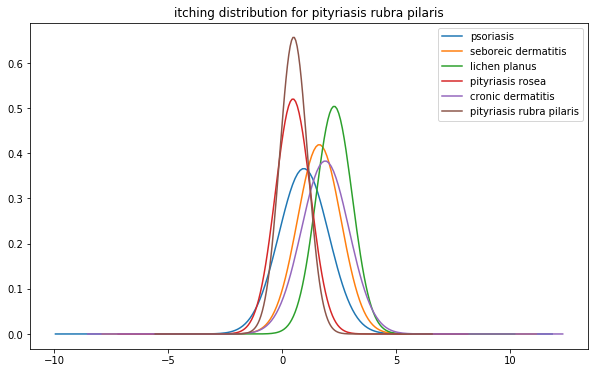

In [0]:
f, axs = plt.subplots(1, 1, sharey=False, sharex=False, figsize = (10,6))

for key,value in classes_means.items():
    plot_gaussian(value, np.sqrt(classes_vars[key]), ax=axs, N=10, label=key)
    axs.title.set_text('itching distribution for ' + key)
    axs.legend()
plt.show()

¿Cuál es la probabilidad de que un paciente con pityriasis rubra pilaris presente un grado 0 de itching?


$$P(\frac{B_{itching}=0}{A=pityriasisrubrapilaris})$$


In [0]:
prob_condicional=gaussian(0,classes_means['pityriasis rubra pilaris'],np.sqrt(classes_vars['pityriasis rubra pilaris']))
print(prob_condicional)

0.46815313154185856


¿cuál es el likelihood de esta observación?

$$P(\frac{B_{itching}=0}{A=pityriasisrubrapilaris}) * P(A=pityriasisrubrapilaris)$$

In [0]:
likelihood=apriori_dict['pityriasis rubra pilaris']*prob_condicional
print(likelihood)

0.025582138335620685


¿Cuál es la probabilidad de que un paciente con **lichen planus** presente un grado 2 de **parakeratosis**? Tendrás que calcular la media y el desvío estándar de la parakeratosis para cada patología, como hicimos con itching

In [0]:
[....te toca implementar]

Para simplificación, tomaremos únicamente tres variables. Se tiene el siguiente resultado de análisis clínico e histológico para estas tres variablse, y se desea calcular la probabilidad a posteriori de que este resultado indique que el paciente tiene **psoriasis**. 

In [0]:
variables_considered = ['itching','parakeratosis','spongiosis']
sample_of_variables = [2, 2, 3]

Comenzamos calculando la probabilidad condicional de cada observación para cada patología (probabilidad de obtener ese grado de variable en un paciente con esa patología)

In [0]:
probs_condicionales = np.zeros((len(pathology_names),len(variables_considered)))
for p,pathology in enumerate(pathology_names):
    for i,variable in enumerate(variables_considered):
        mean_var_path = data_variables[data_targets==p+1,i].mean(axis=0) 
        std_var_path = np.sqrt(data_variables[data_targets==p+1,i].var(axis=0,ddof=1))        
        probs_condicionales[p,i]=gaussian(sample_of_variables[i],mean_var_path,std_var_path)
        print(pathology +' con '+ variable + '=' + str(sample_of_variables[i]) + ': '+ str(probs_condicionales[p,i]))
        

psoriasis con itching=2: 0.5776287711690937
psoriasis con parakeratosis=2: 0.6055433758596596
psoriasis con spongiosis=3: 0.20759825275121432
seboreic dermatitis con itching=2: 0.5898567396862512
seboreic dermatitis con parakeratosis=2: 0.7284144767477038
seboreic dermatitis con spongiosis=3: 0.019370076085322065
lichen planus con itching=2: 0.6592809043808283
lichen planus con parakeratosis=2: 0.5146530598352851
lichen planus con spongiosis=3: 0.24155798825956407
pityriasis rosea con itching=2: 0.6704115612657748
pityriasis rosea con parakeratosis=2: 0.4935669390165488
pityriasis rosea con spongiosis=3: 0.024151768744608487
cronic dermatitis con itching=2: 0.45025250208019996
cronic dermatitis con parakeratosis=2: 0.24550913972543523
cronic dermatitis con spongiosis=3: 0.024512157547667217
pityriasis rubra pilaris con itching=2: 0.7778583726196552
pityriasis rubra pilaris con parakeratosis=2: 0.7664925525108743
pityriasis rubra pilaris con spongiosis=3: 0.019402344407000536


¿Cuál es el likelihood de esta observación para psoriasis? Si asumimos que las tres variables consideradas son independientes, podemos decir que la probabilidad conjunta condicional de estas tres observaciones es el producto de las tres probabilidades condicionales. 

In [0]:
likelihood_psoriasis = apriori_dict['psoriasis']*probs_condicionales[0,0]*probs_condicionales[0,1]*probs_condicionales[0,2]
print("Probabilidad no normalizada a posteriori de psoriasis: ",likelihood_psoriasis)

Probabilidad no normalizada a posteriori de psoriasis:  0.022220544959576025


Notar que no hace falta calcular el denominador

En este caso nuestras seis patologías se corresponden a seis modelos generadores. ¿Cuál es el modelo generador con mayor likelihood para esta observación de tres variables? Es decir, ¿cuál es la patología más probable para este paciente?

In [0]:
[...te toca implementar]

**Utilizando sklearn**

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(data_variables, data_targets)
model.theta_

array([[2.28571429, 2.19642857, 2.09821429, 0.94642857, 0.66964286,
        0.        , 0.03571429, 0.        , 1.63392857, 1.52678571,
        0.28571429, 0.        , 0.03571429, 1.11607143, 0.        ,
        0.26785714, 2.09821429, 0.82142857, 2.        , 2.11607143,
        2.25892857, 2.05357143, 0.85714286, 1.15178571, 0.        ,
        1.19642857, 0.00892857, 0.        , 0.        , 0.        ,
        0.        , 1.86607143, 0.02678571],
       [2.27868852, 2.06557377, 0.95081967, 1.62295082, 0.03278689,
        0.        , 0.01639344, 0.        , 0.06557377, 0.1147541 ,
        0.04918033, 0.        , 0.45901639, 1.08196721, 0.        ,
        2.19672131, 1.7704918 , 0.21311475, 0.98360656, 0.        ,
        0.16393443, 0.01639344, 0.16393443, 0.        , 0.        ,
        0.        , 0.        , 2.16393443, 0.        , 0.01639344,
        0.01639344, 1.60655738, 0.03278689],
       [2.08333333, 1.625     , 2.09722222, 2.27777778, 1.34722222,
        2.27777778, 0.    

Investigá en la documentación qué son los atributos sigma_ y theta_ de un objeto GaussianNB. Usando estos atributos, graficá nuevamente las distribuciones normales de cada patología para la variable 'itching' 

In [0]:
[...te toca implementar]

**División de sets de datos**

Para evaluar si el ajuste de nuestro modelo es bueno, dividiremos el set de pacientes en entrenamiento y test.

In [0]:
from sklearn.model_selection import train_test_split

print("Total de muestras: " + str(len(data_targets)))
TEST_PERCENTAGE=0.2
X_train, X_test, y_train, y_test = train_test_split(data_variables, data_targets, test_size=TEST_PERCENTAGE, random_state=4) 
#Investigá: qué utilidad tiene aclarar el random_state?

print("Muestras de entrenamiento: " + str(len(y_train)))

print("Muestras de prueba: " + str(len(y_test)))



Total de muestras: 366
Muestras de entrenamiento: 292
Muestras de prueba: 74


In [0]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

In [0]:
predictions = model.predict(X_test)

¿Cuál es el porcentaje de lesiones clasificadas correctamente?

In [0]:
[...te toca implementar]

**Búsqueda de hiperpárametros** 

La constante de smoothing se define como una proporción de la mayor varianza encontrada en la distribución de variables, y se sumará a todas las varianzas para estabilizar el proceso de ajuste. Por ejemplo, tomando var_smoothin=1e-1:


In [0]:
gnb = GaussianNB(var_smoothing=1e-1)
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
porc=sum(y_pred==y_test)/y_test.shape[0]*100
print("El porcentaje de lesiones clasificados correctamente es: {}%".format(porc))


El porcentaje de lesiones clasificados correctamente es: 95.94594594594594%


--------------------------------------------------------------------------------------------------
Buscaremos optimizar el valor de var_smoothing. Para eso, necesitamos volver a dividir el set de entrenamiento, para tener un set de entrenamiento y un set de validación. 


In [0]:
X_train_nuevo, X_val, y_train_nuevo, y_val = [...te toca implementar]

Calcular el porcentaje de lesiones clasificadas correctamente para los siguientes valores de var_smoothing, ajustando el modelo en el set de entrenamiento y evaluando en el set de validación. 

-  1e-3
-  1e-5
-  1e-7
-  1e-9
-  1e-11
-  1e-13

In [0]:
[...te toca implementar]

Con el var_smoothing que mejor desempeño tuvo en validación, ajusta un modelo usando el conjunto combinado del set de entrenamiento y validación. Luego, evaluá este modelo en el set de testeo. ¿Cuál es el porcentaje de predicciones correctas?

In [0]:
[...te toca implementar]

Dado que tenemos seis patologías, si deseamos hacer una matriz de confusión tendremos una matriz de 6x6. Si guardás las predicciones de tu modelo en test en una variable y_pred, podés calcular la matriz como:

In [0]:
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(y_test, y_pred, labels=pathology_names)
print(cf)

Si nos enfocamos en una patología, podemos calcular las métricas del test diagnóstico: sensibilidad, especificidad, valor predictivo positivo y valor predictivo negativo. Si elegimos por ejemplo psoarisis, podemos mapear los diagnósticos a dos salidas: positivo o negativo para psoarisis. 

In [0]:
targets_ps = np.where(data.targets!=1, 0, data.targets)

--------------------------------------------------------------------------------------------------
Las variables son tanto histopatológicas (requieren de una biopsia) como clínicas. ¿Qué pasa si tomamos sólo los factores clínicos? Ajustá un modelo GaussianNB únicamente a las variables clínicas, y calculá las predicciones para el set de testeo usando también sólo variables clínicas. 

In [0]:
[...te toca implementar]

--------------------------------------------------------------------------------------------------

¿El mismo var_smoothing sigue siendo el más óptimo? Encontrá cual es el mejor var_smoothing cuando el modelo sólo considera variables clínicas 

In [0]:
[...te toca implementar]

--------------------------------------------------------------------------------------------------
¿Y si tomamos sólo los factores histopatológicos? ¿El mismo var_smoothing sigue siendo el más óptimo?

In [0]:
[...te toca implementar]

--------------------------------------------------------------------------------------------------

¿Qué modelo recomendarías? ¿Cuál creés que preferiría el dermatólogo?
